In [0]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist=input_data.read_data_sets("MNIST_data")
print(mnist)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fdd61081f28>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fdd610922e8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fdd610925f8>)


In [0]:
def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1=tf.layers.dense(inputs=z,units=256,activation=tf.nn.leaky_relu)
        hidden2=tf.layers.dense(inputs=hidden1,units=256,activation=tf.nn.leaky_relu)
        #hidden3=tf.layers.dense(inputs=hidden2,units=256,activation=tf.nn.leaky_relu)
        output=tf.layers.dense(inputs=hidden2,units=784,activation=tf.nn.tanh)
        
        return output


In [0]:
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1=tf.layers.dense(inputs=X,units=256,activation=tf.nn.leaky_relu)
        hidden2=tf.layers.dense(inputs=hidden1,units=256,activation=tf.nn.leaky_relu)
        #hidden3=tf.layers.dense(inputs=hidden2,units=256,activation=tf.nn.leaky_relu)
        logits=tf.layers.dense(hidden2,units=1)
        output=tf.sigmoid(logits)
        
        return output,logits
    

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
on epoch10


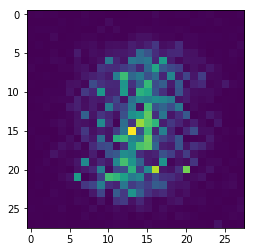

on epoch20


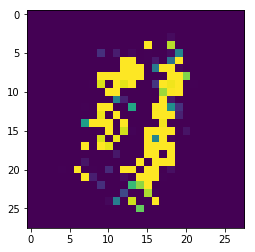

on epoch30


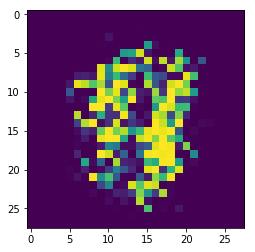

on epoch40


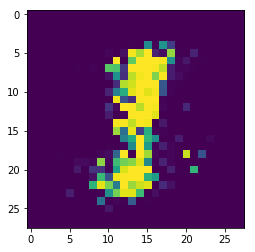

on epoch50


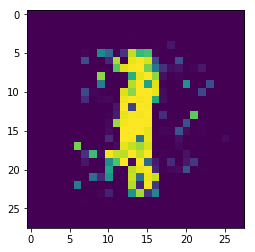

on epoch60


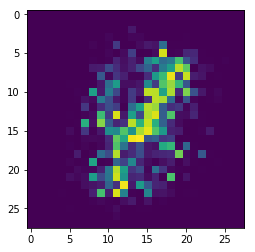

on epoch70


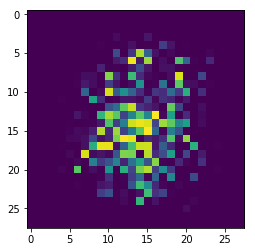

on epoch80


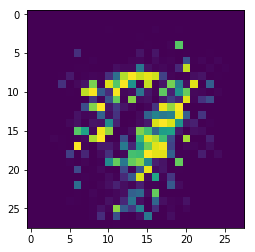

on epoch90


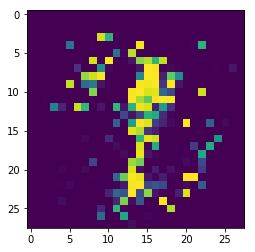

on epoch100


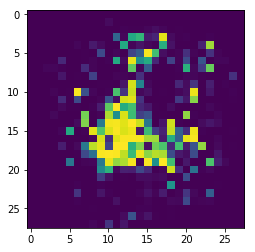

on epoch110


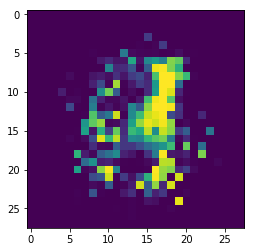

on epoch120


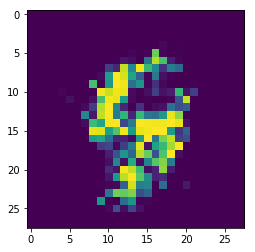

on epoch130


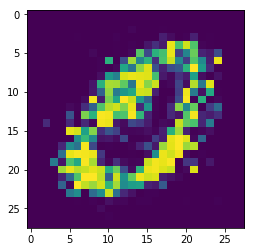

on epoch140


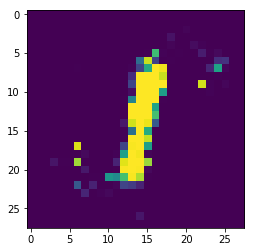

on epoch150


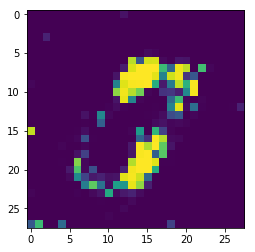

on epoch160


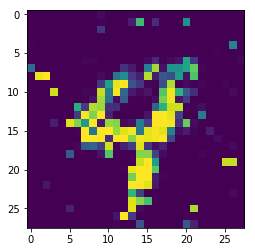

on epoch170


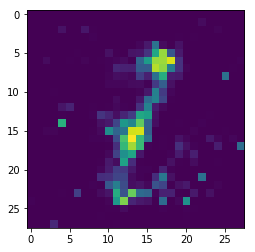

on epoch180


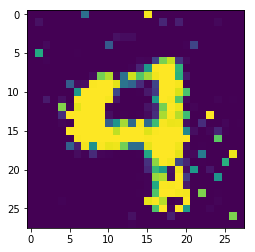

on epoch190


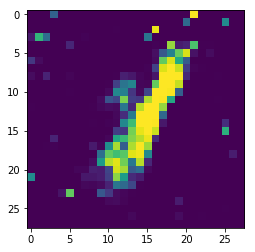

on epoch200


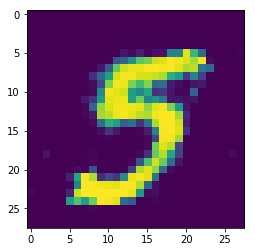

on epoch210


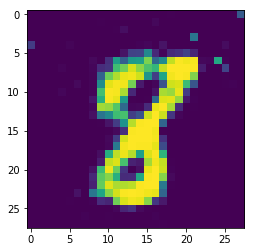

on epoch220


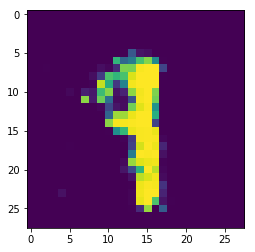

on epoch230


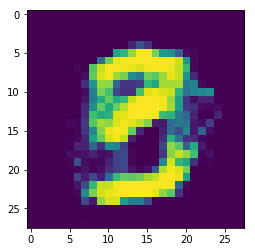

on epoch240


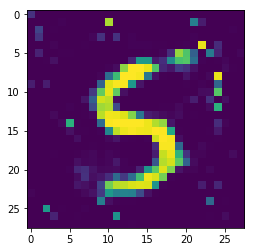

on epoch250


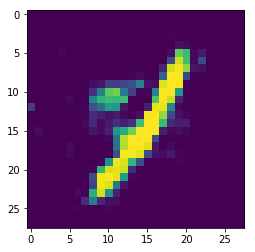

on epoch260


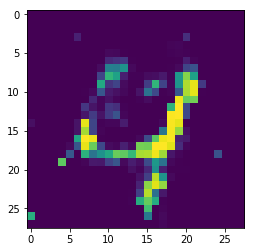

on epoch270


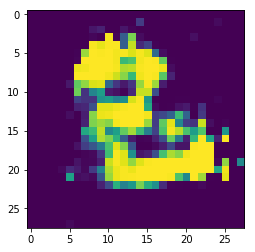

on epoch280


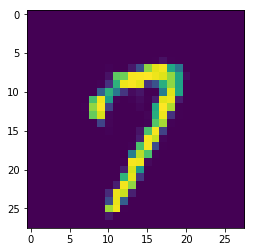

on epoch290


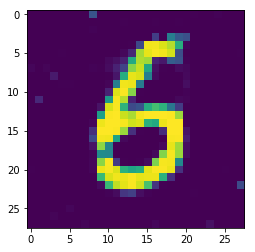

on epoch300


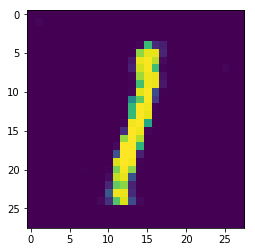

on epoch310


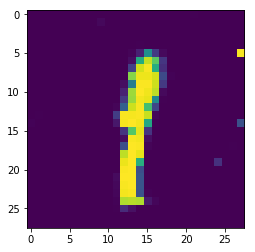

on epoch320


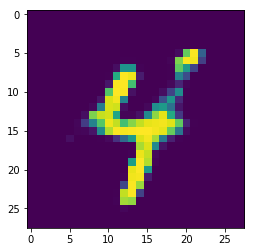

on epoch330


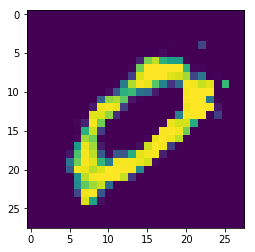

on epoch340


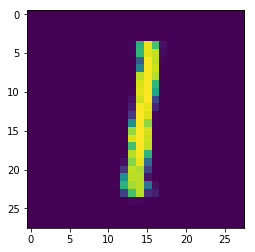

on epoch350


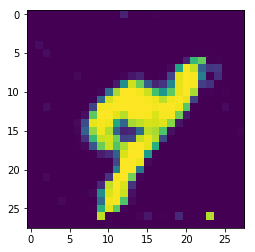

on epoch360


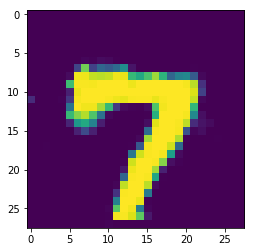

on epoch370


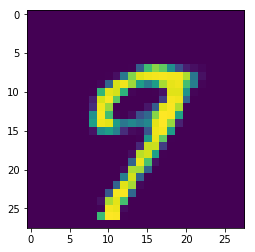

on epoch380


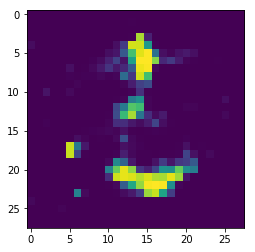

on epoch390


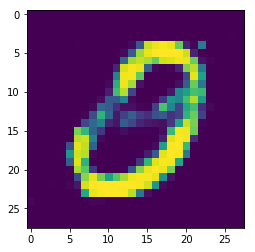

on epoch400


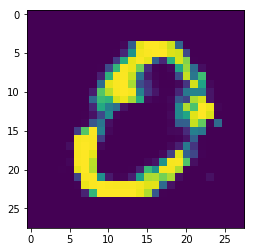

on epoch410


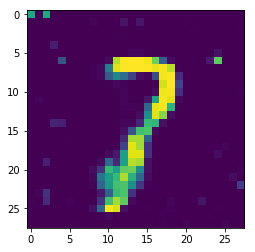

on epoch420


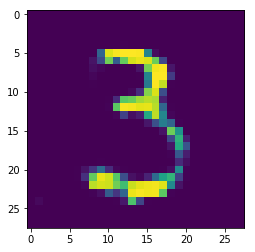

on epoch430


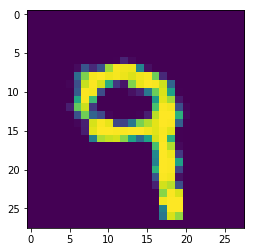

on epoch440


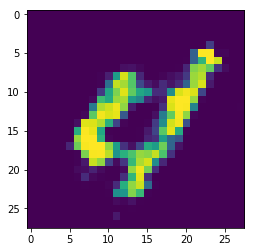

on epoch450


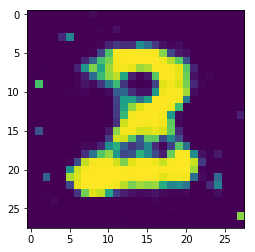

on epoch460


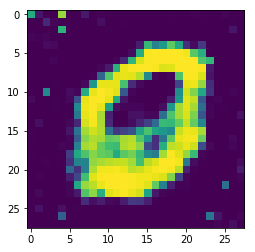

on epoch470


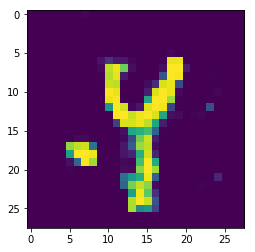

on epoch480


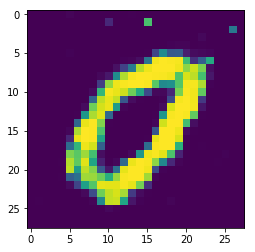

on epoch490


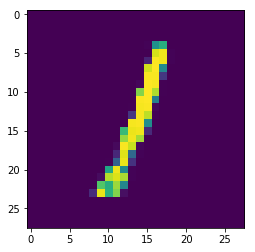

on epoch500


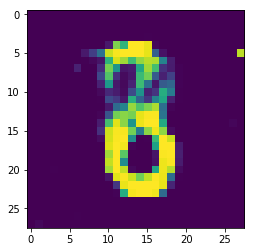

on epoch510


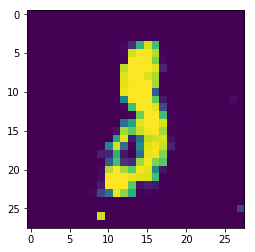

on epoch520


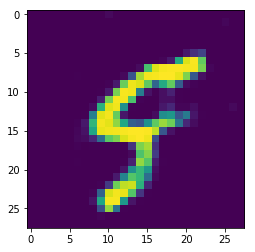

on epoch530


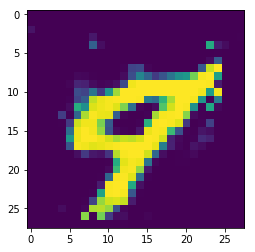

on epoch540


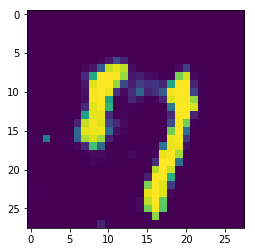

on epoch550


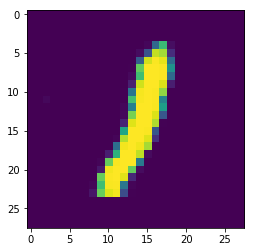

on epoch560


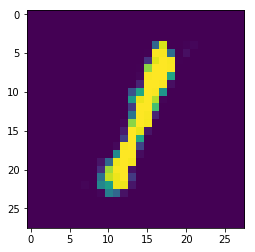

on epoch570


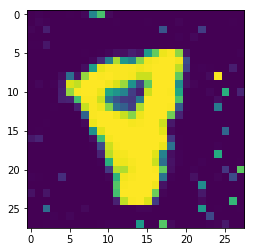

on epoch580


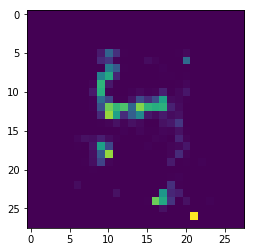

on epoch590


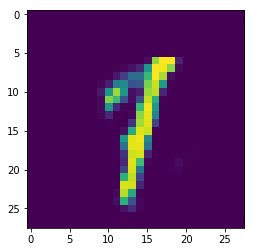

on epoch600


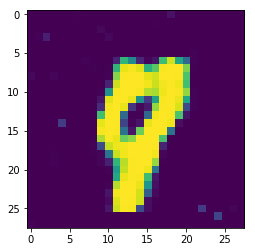

on epoch610


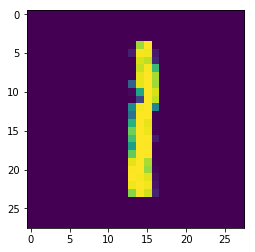

on epoch620


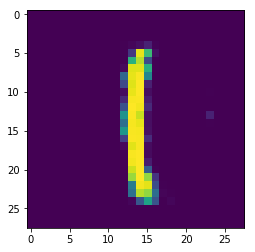

on epoch630


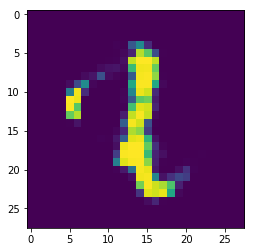

on epoch640


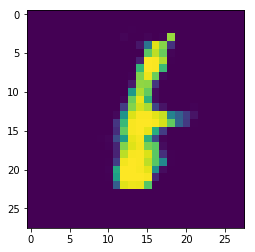

on epoch650


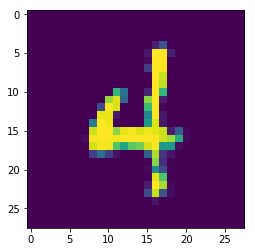

on epoch660


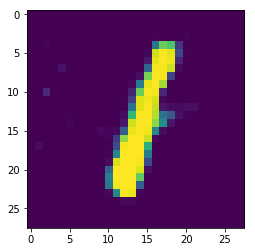

on epoch670


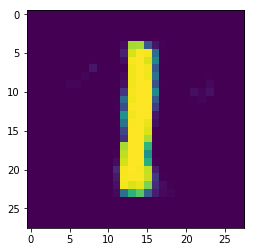

on epoch680


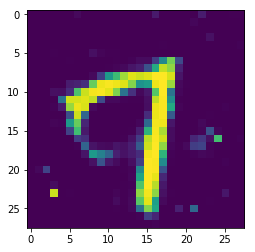

on epoch690


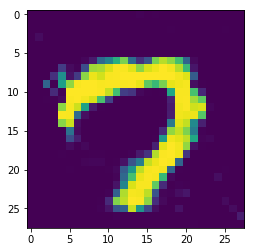

on epoch700


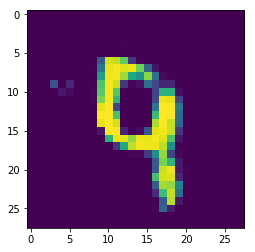

on epoch710


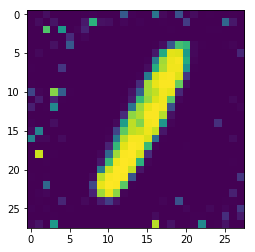

on epoch720


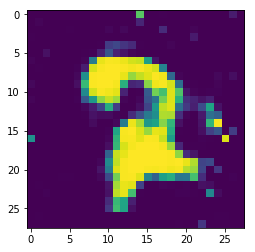

on epoch730


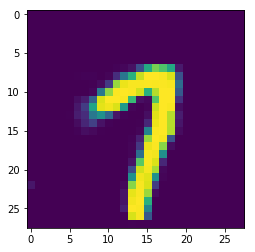

on epoch740


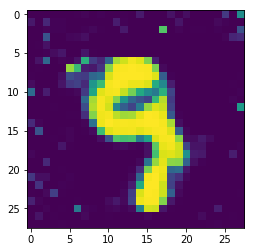

on epoch750


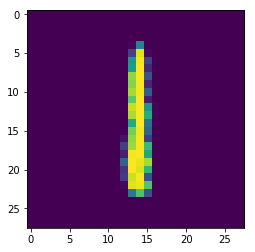

on epoch760


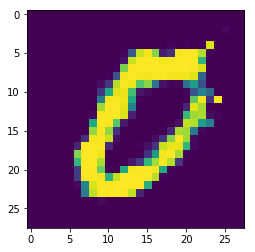

on epoch770


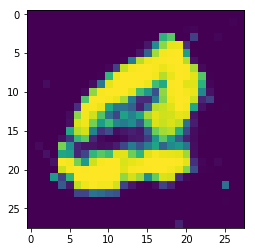

on epoch780


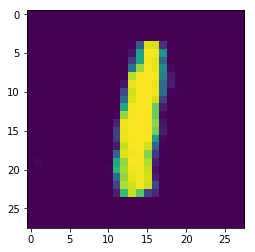

on epoch790


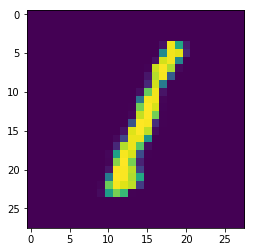

on epoch800


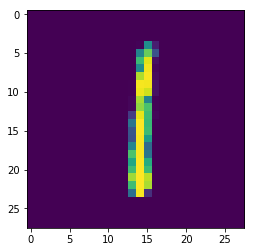

on epoch810


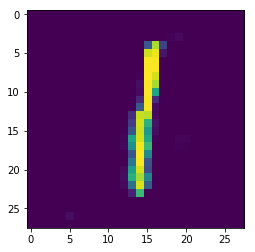

on epoch820


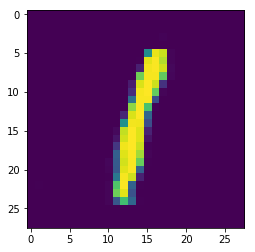

on epoch830


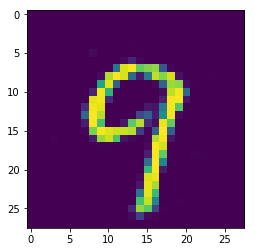

on epoch840


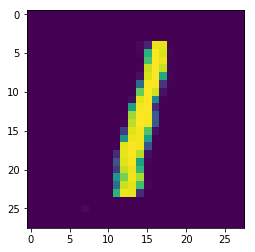

on epoch850


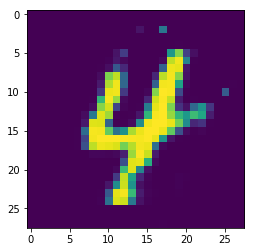

on epoch860


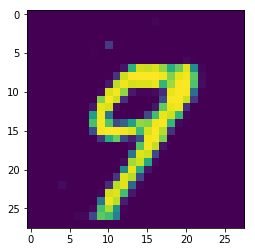

on epoch870


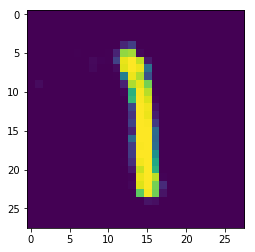

on epoch880


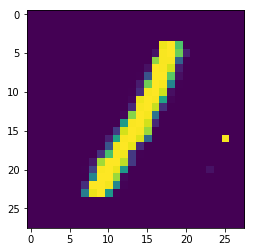

on epoch890


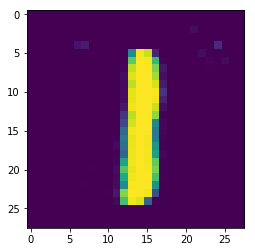

on epoch900


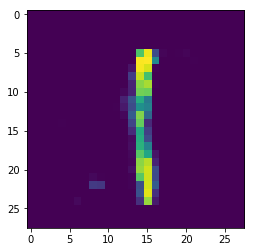

on epoch910


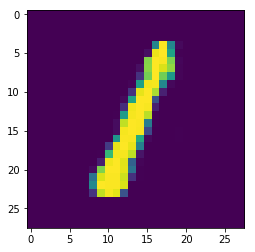

on epoch920


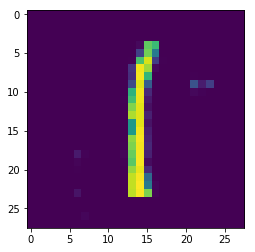

on epoch930


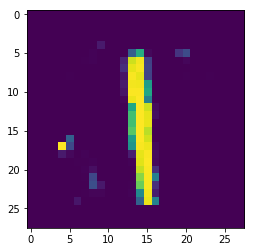

on epoch940


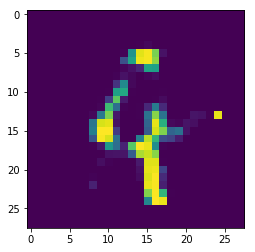

on epoch950


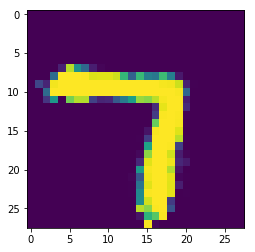

on epoch960


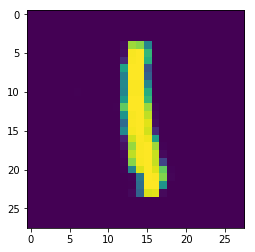

on epoch970


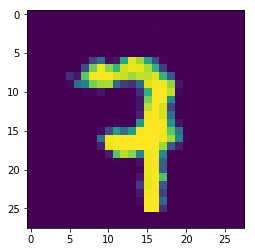

on epoch980


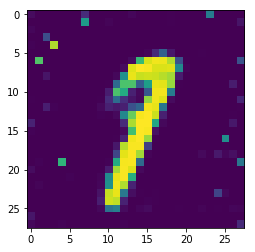

on epoch990


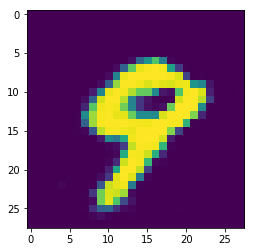

on epoch1000


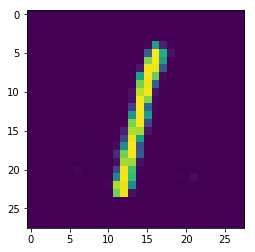

on epoch1010


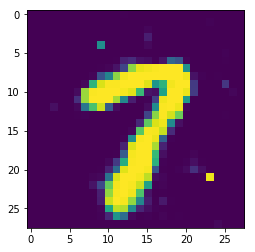

on epoch1020


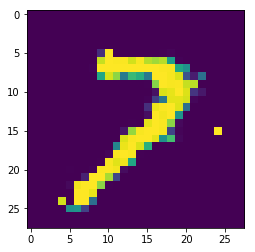

on epoch1030


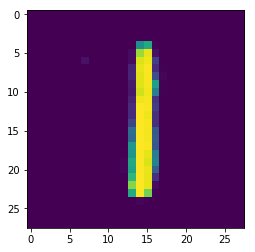

on epoch1040


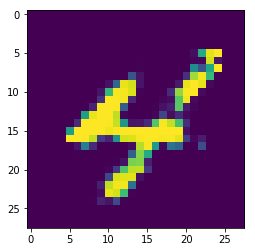

on epoch1050


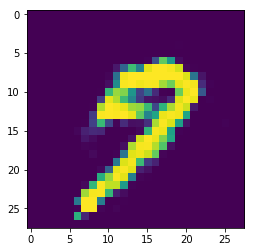

on epoch1060


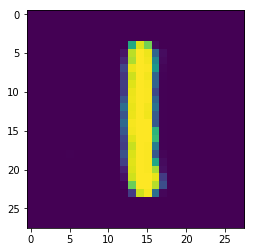

on epoch1070


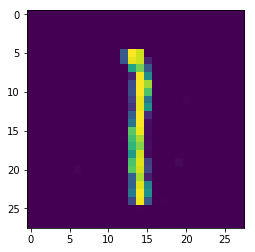

on epoch1080


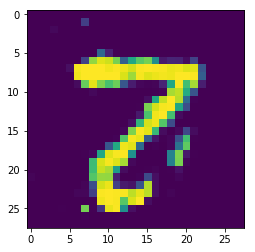

on epoch1090


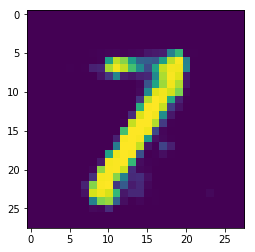

on epoch1100


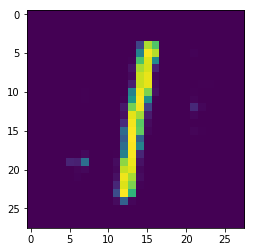

on epoch1110


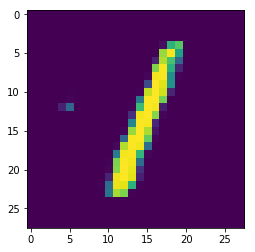

on epoch1120


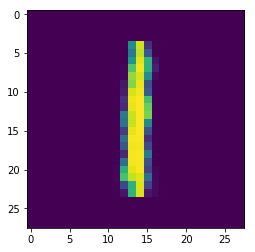

on epoch1130


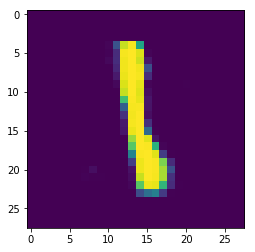

on epoch1140


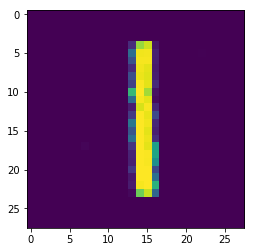

on epoch1150


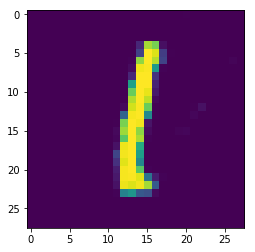

on epoch1160


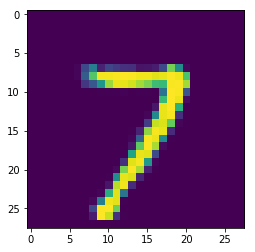

on epoch1170


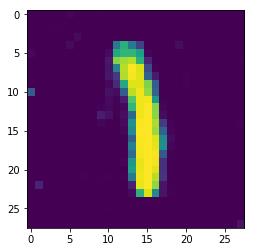

on epoch1180


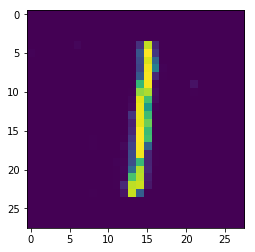

on epoch1190


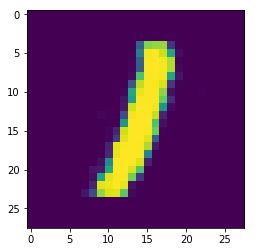

on epoch1200


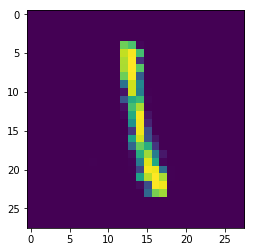

on epoch1210


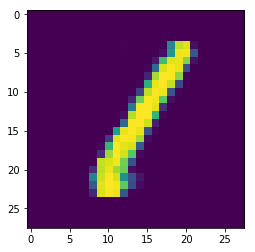

on epoch1220


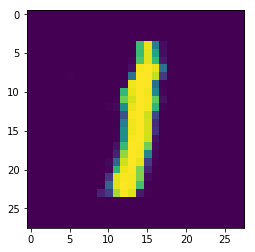

on epoch1230


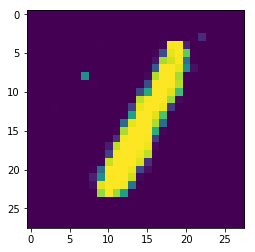

on epoch1240


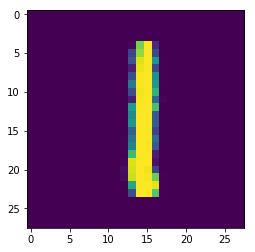

on epoch1250


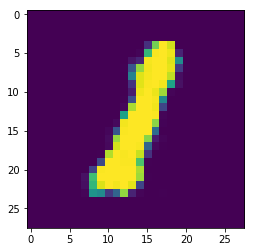

KeyboardInterrupt: ignored

In [0]:

tf.reset_default_graph()

real_images=tf.placeholder(tf.float32,shape=[None,784])
z=tf.placeholder(tf.float32,shape=[None,200])

G=generator(z)
D_output_real,D_logits_real=discriminator(real_images)
D_output_fake,D_logits_fake=discriminator(G,reuse=True)

def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

D_real_loss=loss_func(D_logits_real,tf.ones_like(D_logits_real)*0.9) #Smoothing for generalization
D_fake_loss=loss_func(D_logits_fake,tf.zeros_like(D_logits_real))
D_loss=D_real_loss+D_fake_loss

G_loss= loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

lr=0.001

#Do this when multiple networks interact with each other
tvars=tf.trainable_variables()  #returns all variables created(the two variable scopes) and makes trainable true
d_vars=[var for var in tvars if 'dis' in var.name]
g_vars=[var for var in tvars if 'gen' in var.name]

D_trainer=tf.train.AdamOptimizer(lr).minimize(D_loss,var_list=d_vars)
G_trainer=tf.train.AdamOptimizer(lr).minimize(G_loss,var_list=g_vars)

batch_size=100
epochs=500
init=tf.global_variables_initializer()

samples=[] #generator examples
sess = tf.Session()
sess.run(init)
for epoch in range(epochs):
  num_batches=mnist.train.num_examples//batch_size
  for i in range(num_batches):
    batch=mnist.train.next_batch(batch_size)
    batch_images=batch[0].reshape((batch_size,784))
    batch_images=batch_images*2-1
    batch_z=np.random.uniform(-1,1,size=(batch_size,200))
    #batch_z=np.random.rand(batch_size,100)
    _=sess.run(D_trainer,feed_dict={real_images:batch_images,z:batch_z})
    _=sess.run(G_trainer,feed_dict={z:batch_z})
            
  #print("on epoch{}".format(epoch))
  if(epoch %10 == 0 and epoch >2):
    #plt.subplot(20,10,epoch+1)
    print("on epoch{}".format(epoch))
    plt.imshow(samples[epoch -1].reshape(28,28))
    plt.show()
  #cv2_imshow('img'+ str(epoch),samples[epoch -1].reshape(28,28))
  sample_z=np.random.uniform(-1,1,size=(1,200))
  gen_sample=sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        
  samples.append(gen_sample)
#plt.figure(figsize=(5,2))
for i in range(10):
  #plt.subplot(5,2,i+1)
  sample_z=np.random.uniform(-1,1,size=(1,200))
  gen_sample=sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
  plt.imshow(gen_sample.reshape(28,28))

#plt.imshow(samples[99].reshape(28,28))

#plt.imshow(samples[99].reshape(28,28))

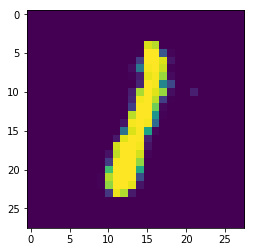

In [0]:
#with tf.Session() as sess:
#sess = tf.Session()
#init=tf.global_variables_initializer()
#sess.run(init)

sample_z=np.random.uniform(-1,1,size=(1,200))
sample_z=np.random.rand(1,200)
gen_sample=sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
plt.imshow(gen_sample.reshape(28,28))
#plt.imshow(samples[90].reshape(28,28))

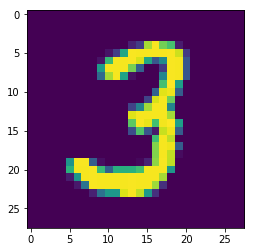

In [0]:
plt.imshow(batch_images[5].reshape(28,28))

In [0]:
mnist.train.shape

AttributeError: ignored

AttributeError: ignored

In [0]:
mnist.train.num_examples

55000